# Data Cleaning and Feature Engineering

## Modeling Process

**Cross-industry standard process for data mining**, known as **CRISP-DM**, is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model.

6 high level phases of the data mining process:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

The sequence of the phases is not strict and moving back and forth between different phases as it is always required.


<img src='https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png' width ="400">

## Dataset Understanding

Today we are going to be working with the IMDB movie data set.  Our goal is to eventually create a linear regression model that will enable us to predict the box office gross of a movie based on characteristics of the movie.

Before we can start to model, we need to make sure our data is clean an in a usable format.  Therefore we will go through several steps of data cleaning. The code below is not a fully exhaustive list, but includes many of the process you will go through to clean data.  

In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

### Check Your Data … Quickly
The first thing you want to do when you get a new dataset, is to quickly to verify the contents with the .head() method.

In [2]:
df = pd.read_csv('movie_metadata.csv')
print(df.shape)
df.head()


(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now let’s quickly see the names and types of the columns. Most of the time you’re going get data that is not quite what you expected, such as dates which are actually strings and other oddities. But to check upfront.

In [3]:
# Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Convert a column to a different data type

The most common example of this is converting a string of number to an actual float or integer.  There are two ways you can achieve this.  

1. astype(float) method

`df['DataFrame Column'] = df['DataFrame Column'].astype(float)`
2.  to_numeric method

`df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')`

What is the difference in these two methods?

(1) For a column that contains numeric values stored as strings;

(2) For a column that contains both numeric and non-numeric values. By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.


https://datatofish.com/convert-string-to-float-dataframe/

In [4]:
df['title_year'][0]

2009.0

In [5]:
df['title_year']= pd.to_datetime(df['title_year'], format='%Y')

In [6]:
df.dtypes

color                                object
director_name                        object
num_critic_for_reviews              float64
duration                            float64
director_facebook_likes             float64
actor_3_facebook_likes              float64
actor_2_name                         object
actor_1_facebook_likes              float64
gross                               float64
genres                               object
actor_1_name                         object
movie_title                          object
num_voted_users                       int64
cast_total_facebook_likes             int64
actor_3_name                         object
facenumber_in_poster                float64
plot_keywords                        object
movie_imdb_link                      object
num_user_for_reviews                float64
language                             object
country                              object
content_rating                       object
budget                          

In [7]:
df['title_year']

0      2009-01-01
1      2007-01-01
2      2015-01-01
3      2012-01-01
4             NaT
          ...    
5038   2013-01-01
5039          NaT
5040   2013-01-01
5041   2012-01-01
5042   2004-01-01
Name: title_year, Length: 5043, dtype: datetime64[ns]

### Drop Columns

If you do not plan on using some data in your analysis, feel free to drop those columns. 

In [8]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [9]:
df.drop(columns=['aspect_ratio', 'plot_keywords'], inplace=True)

In [10]:
df.shape

(5043, 26)

In [11]:
df.drop([0,1,2,3], axis=0)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013-01-01,470.0,7.7,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaT,593.0,7.5,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013-01-01,0.0,6.3,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012-01-01,719.0,6.3,660


In [12]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaT,12.0,7.1,0


In [13]:
smaller_df=df[['gross','budget']]

## Investigate the data

In [14]:
df['country'].value_counts()

USA                   3807
UK                     448
France                 154
Canada                 126
Germany                 97
                      ... 
Nigeria                  1
Finland                  1
Libya                    1
Official site            1
Dominican Republic       1
Name: country, Length: 65, dtype: int64

We have movies from many different countries in this data set. If our goal is to only predict movies that were released in theaters, we probably don't want to include foreign movies.  So let's remove them from the data set.


Write code to only leave us with movies from the US.

In [15]:
#your code here

df= df[df['country']=='USA']

In [16]:
df.shape

(3807, 26)

Let's also look at `content_rating`.

In [17]:
df.content_rating

0           PG-13
1           PG-13
3           PG-13
5           PG-13
6           PG-13
          ...    
5037    Not Rated
5039        TV-14
5040          NaN
5041        PG-13
5042           PG
Name: content_rating, Length: 3807, dtype: object

In [18]:
df['content_rating'].value_counts()

R            1571
PG-13        1208
PG            558
G              85
Not Rated      51
Approved       46
Unrated        38
TV-14          25
TV-PG          13
TV-MA          12
X              12
Passed          9
TV-G            8
NC-17           5
GP              4
M               3
TV-Y7           1
Name: content_rating, dtype: int64

In [19]:
#look at the unique values for ratings
ratings = list(df['content_rating'].unique())
ratings

['PG-13',
 'PG',
 'G',
 'R',
 'TV-14',
 'TV-PG',
 'TV-MA',
 'TV-G',
 nan,
 'Unrated',
 'Approved',
 'X',
 'TV-Y7',
 'GP',
 'Not Rated',
 'Passed',
 'M',
 'NC-17']

In [20]:
df['content_rating'].value_counts()

R            1571
PG-13        1208
PG            558
G              85
Not Rated      51
Approved       46
Unrated        38
TV-14          25
TV-PG          13
TV-MA          12
X              12
Passed          9
TV-G            8
NC-17           5
GP              4
M               3
TV-Y7           1
Name: content_rating, dtype: int64

There are many unique values that don't have a high count or don't make sense to the common user.  How should we handle these?

In [21]:
#create a list of the ratings we want to group
unrated = ['Unrated','Approved', 'Not Rated', 'TV-MA', 'M', 'GP', 'Passed', np.nan, 'X', 'NC-17','TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7']

In [22]:
#create a list of the movie ratings we want to maintian
rated = [x for x in ratings if x not in unrated]

In [23]:
rated

['PG-13', 'PG', 'G', 'R']

In [24]:
#create a dictionary with keys of the 'unrated' values and the value being 'unrated'
unrated_dict = dict.fromkeys(unrated, 'unrated')

In [25]:
unrated_dict

{'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

In [26]:
rated

['PG-13', 'PG', 'G', 'R']

In [27]:
#create a dictionary of the rated values
rated_dict  = dict(zip(rated, rated))

In [28]:
rated_dict

{'PG-13': 'PG-13', 'PG': 'PG', 'G': 'G', 'R': 'R'}

In [29]:
#combine those ditionaries into 1
ratings_map = {**rated_dict,**unrated_dict}
ratings_map

{'PG-13': 'PG-13',
 'PG': 'PG',
 'G': 'G',
 'R': 'R',
 'Unrated': 'unrated',
 'Approved': 'unrated',
 'Not Rated': 'unrated',
 'TV-MA': 'unrated',
 'M': 'unrated',
 'GP': 'unrated',
 'Passed': 'unrated',
 nan: 'unrated',
 'X': 'unrated',
 'NC-17': 'unrated',
 'TV-14': 'unrated',
 'TV-PG': 'unrated',
 'TV-G': 'unrated',
 'TV-Y': 'unrated',
 'TV-Y7': 'unrated'}

#### What does `**` do? 

It basically takes the dictionary passed through and unpacks it.  

https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558

https://pynash.org/2013/03/13/unpacking/

In [30]:
# use the pandas map function to change the content_rating column
df['rating'] = df['content_rating'].map(ratings_map)

In [31]:
#compare the two columns
df[['rating', 'content_rating']].tail()

,rating,content_rating
5037,unrated,Not Rated
5039,unrated,TV-14
5040,unrated,NaN
5041,PG-13,PG-13
5042,PG,PG


## Handling Missing Data:
    


In [32]:
#creates a dataframe of booleans show where data is missing
df.isna().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.003677
director_name                0.019438
num_critic_for_reviews       0.010244
duration                     0.001576
director_facebook_likes      0.019438
actor_3_facebook_likes       0.003415
actor_2_name                 0.001839
actor_1_facebook_likes       0.001051
gross                        0.150250
genres                       0.000000
actor_1_name                 0.001051
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.003415
facenumber_in_poster         0.003152
movie_imdb_link              0.000000
num_user_for_reviews         0.003415
language                     0.002627
country                      0.000000
content_rating               0.041502
budget                       0.078277
title_year                   0.019438
actor_2_facebook_likes       0.001839
imdb_score                   0.000000
movie_facebook_likes         0.000000
rating      

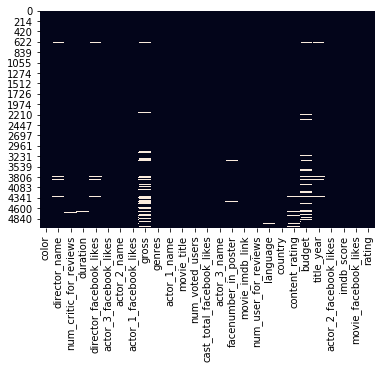

In [34]:
#graphically see the missing data
sns.heatmap(df.isna(), cbar=False)

#### Dropping missing rows

One way to handle missing data is just to drop the observation from the data set. This is not always the ideal way since you will lose obseervations, but it might be unavoidable.  For example, we want to predict the gross earnings for each film, so we have to remove those that don't have value for gross.

In [35]:
df.dropna(subset=['gross'], inplace=True)

In [36]:
df.shape

(3235, 27)

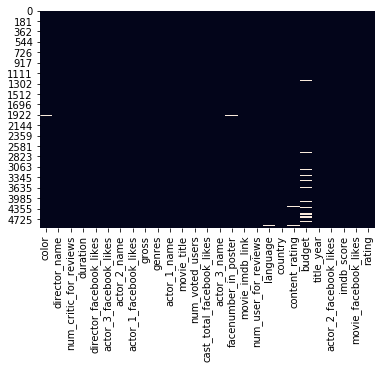

In [37]:
sns.heatmap(df.isnull(), cbar=False)

In [38]:
#look at all the observations with at least one missing data point
df[df['budget'].isna()].head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,The Good Dinosaur,62836,696,Peter Sohn,0.0,http://www.imdb.com/title/tt1979388/?ref_=fn_t...,345.0,English,USA,PG,NaN,2015-01-01,150.0,6.8,20000,PG
444,Color,Gary Winick,120.0,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,Charlotte's Web,27838,23907,Oprah Winfrey,0.0,http://www.imdb.com/title/tt0413895/?ref_=fn_t...,102.0,English,USA,G,NaN,2006-01-01,8000.0,6.4,0,G
477,Color,Henry Jaglom,19.0,117.0,69.0,87.0,Stephen Dillane,898.0,821997.0,Drama|Romance,Vanessa Redgrave,Déjà Vu,666,1753,Michael Brandon,0.0,http://www.imdb.com/title/tt0119033/?ref_=fn_t...,40.0,English,USA,PG-13,NaN,1997-01-01,577.0,7.0,91,PG-13
490,Color,Lee Tamahori,95.0,117.0,93.0,904.0,Harold Perrineau,12000.0,27779888.0,Action|Adventure|Drama|Thriller,Anthony Hopkins,The Edge,55913,14831,Bart the Bear,2.0,http://www.imdb.com/title/tt0119051/?ref_=fn_t...,182.0,English,USA,R,NaN,1997-01-01,1000.0,6.9,0,R
559,Color,David Pastor,130.0,84.0,10.0,394.0,Kiernan Shipka,3000.0,90820.0,Drama|Horror|Sci-Fi|Thriller,Christopher Meloni,Carriers,35510,4368,Lou Taylor Pucci,0.0,http://www.imdb.com/title/tt0806203/?ref_=fn_t...,119.0,English,USA,PG-13,NaN,2009-01-01,552.0,6.0,0,PG-13
640,Color,Craig Gillespie,178.0,117.0,44.0,531.0,Abraham Benrubi,788.0,27550735.0,Action|Drama|History|Thriller,Michael Raymond-James,The Finest Hours,27481,3524,Graham McTavish,0.0,http://www.imdb.com/title/tt2025690/?ref_=fn_t...,113.0,English,USA,PG-13,NaN,2016-01-01,562.0,6.8,12000,PG-13
642,Color,Jay Roach,190.0,114.0,116.0,982.0,Stephanie Szostak,7000.0,72980108.0,Comedy,Steve Carell,Dinner for Schmucks,80338,10419,Bruce Greenwood,2.0,http://www.imdb.com/title/tt0427152/?ref_=fn_t...,264.0,English,USA,PG-13,NaN,2010-01-01,1000.0,5.9,0,PG-13
713,Color,Walt Becker,177.0,100.0,12.0,311.0,Tichina Arnold,419.0,168213584.0,Action|Adventure|Comedy,Jill Hennessy,Wild Hogs,99989,1412,Drew Sidora,3.0,http://www.imdb.com/title/tt0486946/?ref_=fn_t...,255.0,English,USA,PG-13,NaN,2007-01-01,330.0,5.9,0,PG-13
773,Color,Kevin Macdonald,252.0,127.0,162.0,379.0,Harry Lennix,18000.0,36965395.0,Crime|Drama|Mystery|Thriller,Robin Wright,State of Play,113295,19776,Michael Weston,3.0,http://www.imdb.com/title/tt0473705/?ref_=fn_t...,235.0,English,USA,PG-13,NaN,2009-01-01,748.0,7.1,0,PG-13
780,Color,Robert Lorenz,239.0,111.0,39.0,461.0,Ed Lauter,16000.0,35754555.0,Drama|Sport,Clint Eastwood,Trouble with the Curve,47954,17871,Bob Gunton,0.0,http://www.imdb.com/title/tt2083383/?ref_=fn_t...,150.0,English,USA,PG-13,NaN,2012-01-01,897.0,6.8,11000,PG-13


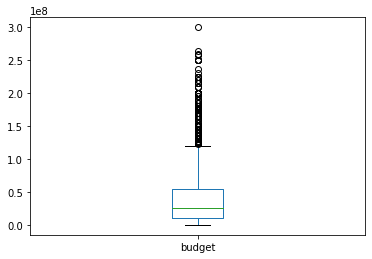

In [39]:
df['budget'].plot(kind='box')

Quite a few films are still missing the values for budget. We do not want to drop this column because we believe it is an important variable, but we must have a value for each observation in order to use it.

**Talk with a partner to think of different ways you can fill in the missing budget values?**

In [40]:
#you can fill the missing values with the average value of the observations
df['budget'].fillna(df['budget'].mean(), inplace=False)

0       2.370000e+08
1       3.000000e+08
3       2.500000e+08
5       2.637000e+08
6       2.580000e+08
            ...     
5033    7.000000e+03
5035    7.000000e+03
5037    9.000000e+03
5041    4.003122e+07
5042    1.100000e+03
Name: budget, Length: 3235, dtype: float64

Another way to fill the missing data

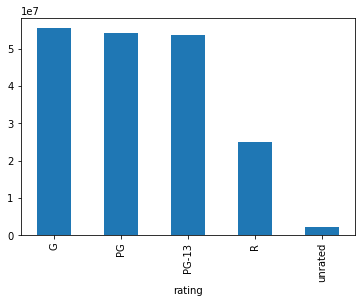

In [41]:
df.groupby('rating')['budget'].mean().plot(kind='bar')

In [42]:
budget_ratings = df.groupby('rating')['budget'].mean().round(1).to_dict()

budget_ratings

{'G': 55436014.1,
 'PG': 54076105.4,
 'PG-13': 53681048.4,
 'R': 25078901.3,
 'unrated': 2228835.6}

In [43]:
df['budget'].fillna(df['rating'].map(budget_ratings), inplace=True)


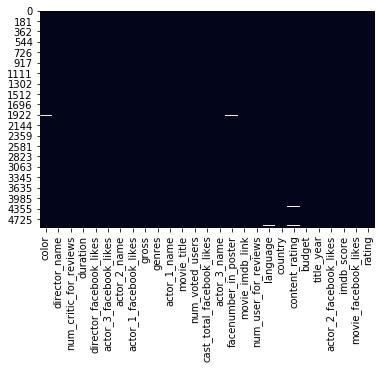

In [44]:
sns.heatmap(df.isnull(), cbar=False)

What statistical test could we use to support our use of this method?

## Handling Categorical Data

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

For the column of `rating`, we can see that the values come through as strings that represent a category.  We can not put a string through as a value for a linear model. Instead we use dummy variables.

In [45]:
df['rating'].value_counts()

R          1406
PG-13      1162
PG          500
unrated      93
G            74
Name: rating, dtype: int64

A **dummy variable** (aka, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.
- Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

In [46]:
pd.get_dummies(df['rating']).head(10)

,G,PG,PG-13,R,unrated
0,0,0,1,0,0
1,0,0,1,0,0
3,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
10,0,0,1,0,0
11,0,0,1,0,0
13,0,0,1,0,0



By creating these dummy variables. We can now include them in the model.  


**In our model should we include all of the columns created by `get_dummies`?**


___

Remember multi-collinearity?  


If you have know the values of a movie for `G`, `PG`, `PG-13`, and `R`, then you already know the value for `unrated`.

Multi-collinearity can exist in the combination of multiple columns, so we need to drop one of them.  

Using all the dummy variables derived from a category is known as the dummy variable trap. Avoid this trap!
- Either don't include in the model _or_ use the parameter `drop_first=True` (see below)

In [47]:
df_dummy = pd.get_dummies(df, columns=['rating'], drop_first=True)

In [48]:
df = pd.concat([df, pd.get_dummies(df['rating'])], 1)
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0,PG-13,0,0,1,0,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010-01-01,553.0,7.8,29000,PG,0,1,0,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015-01-01,21000.0,7.5,118000,PG-13,0,0,1,0,0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016-01-01,4000.0,6.9,197000,PG-13,0,0,1,0,0
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,Superman Returns,240396,29991,Frank Langella,0.0,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006-01-01,10000.0,6.1,0,PG-13,0,0,1,0,0
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2.0,http://www.imdb.com/title/tt0383574/?ref_=fn_t...,1832.0,English,USA,PG-13,225000000.0,2006-01-01,5000.0,7.3,5000,PG-13,0,0,1,0,0


## Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

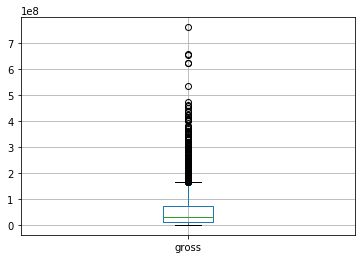

In [49]:
df.boxplot(['gross'])

In [50]:
df.sort_values('gross', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997-01-01,14000.0,7.7,26000,PG-13,0,0,1,0,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015-01-01,2000.0,7.0,150000,PG-13,0,0,1,0,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,123000,PG-13,0,0,1,0,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012-01-01,21000.0,8.1,123000,PG-13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Color,U. Roberto Romano,3.0,80.0,6.0,NaN,NaN,NaN,2245.0,Documentary,NaN,The Harvest/La Cosecha,57,0,NaN,0.0,http://www.imdb.com/title/tt1981703/?ref_=fn_t...,2.0,English,USA,NaN,560000.0,2011-01-01,NaN,7.2,88,unrated,0,0,0,0,1
4843,Color,John D. Hancock,4.0,110.0,44.0,221.0,Elizabeth Stenholt,644.0,1711.0,Drama|Music,Trish Basinger,The Looking Glass,82,1440,Mary Norwood,0.0,http://www.imdb.com/title/tt2912776/?ref_=fn_t...,1.0,English,USA,NaN,2228835.6,2015-01-01,503.0,6.6,175,unrated,0,0,0,0,1
4758,Color,Alex Craig Mann,29.0,87.0,38.0,445.0,Christa B. Allen,552.0,1332.0,Comedy|Horror,Justin Chon,Detention of the Dead,2038,2251,Max Adler,6.0,http://www.imdb.com/title/tt1865346/?ref_=fn_t...,20.0,English,USA,Not Rated,500000.0,2012-01-01,533.0,4.6,898,unrated,0,0,0,0,1
4915,Color,Ricki Stern,11.0,106.0,15.0,0.0,Evelyn Jefferson,2.0,1111.0,Crime|Documentary,Darryl Hunt,The Trials of Darryl Hunt,771,2,John Reeves,0.0,http://www.imdb.com/title/tt0446055/?ref_=fn_t...,10.0,English,USA,PG-13,200000.0,2006-01-01,0.0,7.7,246,PG-13,0,0,1,0,0


In [51]:
# Calculate gross amount that is 3 times above the standard deviation
above_5std = df.gross.mean()+(5*df.gross.std())
above_5std

413880226.563113

### Use a conditional selection to only return values lower than 3 standard deviations above the mean

In [52]:
df.shape

(3235, 32)

In [53]:
df[(df['gross']<=above_5std)&(df['gross']>1000000)].shape

(2898, 32)

## Feature Engineering

### Creating New columns based on other columns

In [54]:
df['actor_1_facebook_likes'].describe()

count      3233.000000
mean       7987.043613
std       16417.080270
min           0.000000
25%         786.000000
50%        1000.000000
75%       13000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [55]:
# Create a new column called df.superstar where the value is 1
# if df.actor_1_facebook_likes is greater th000 and 0 if not
df['superstar'] = np.where(df['actor_1_facebook_likes']>=30000, 1, 0)

df[['movie_title', 'actor_1_name','actor_1_facebook_likes', 'superstar']].head(10)

,movie_title,actor_1_name,actor_1_facebook_likes,superstar
0,Avatar,CCH Pounder,1000.0,0
1,Pirates of the Caribbean: At World's End,Johnny Depp,40000.0,1
3,The Dark Knight Rises,Tom Hardy,27000.0,0
5,John Carter,Daryl Sabara,640.0,0
6,Spider-Man 3,J.K. Simmons,24000.0,0
7,Tangled,Brad Garrett,799.0,0
8,Avengers: Age of Ultron,Chris Hemsworth,26000.0,0
10,Batman v Superman: Dawn of Justice,Henry Cavill,15000.0,0
11,Superman Returns,Kevin Spacey,18000.0,0
13,Pirates of the Caribbean: Dead Man's Chest,Johnny Depp,40000.0,1


In [56]:
df['years_old'] = 2016- pd.DatetimeIndex(df['title_year']).year


In [57]:
df['years_old'] 

0        7
1        9
3        4
5        4
6        9
        ..
5033    12
5035    24
5037     5
5041     4
5042    12
Name: years_old, Length: 3235, dtype: int64

**Create your own new column of data using the method above.**

In [58]:
#your code here

Another data cleaning Resource:

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

### Geospatial Data

This dataset currently comes with the latitude and longitude of each house. This is probably not that useful for us. So now we need  to think about how to transform this data into something more useful.

Looking at the map below, which aparment might cost more to rent 1  or 2?
Why?


<img src='geospatial_vars.png'/>

Looking at this map of East Harlem, how could  we transform lat and long into a more useful data point?

### Time Aggregations:

Imagine this situation. 

You are trying to predict sales for a bar in Williamsburg that has an outdoor patio. You know that weather impacts the sales and want to include it in your features.  

Right now you have weather data at a hourly level, but your sales data is at a daily level. How should we aggregate/convert our hourly data into our daily data?

**EX:** For temperature, I believe that what is most important is how warm it got that day, so I take my hourly data and `resample`  it to give me the max for the day.  

```df['temp'].resample('D').max()```

### Question
Now let's think about this for rain.  Talk with your partner and come up with 3 ways that you can take hourly rain measurements and aggregate it up to a daily level. 

***Hint:*** The outdoor space is primarily used from 12-8pm.  

## Multiple Linear Regression Applied

Now let's fit a model to this data where we try to explain the variance in the box office gross of a movie, using differen variables.  

Try first only including a few variables and see how your model performs according to the R^2 value.  Then add on more variables to see how it impacts the R^2 value. 

In [59]:
df = df[df['content_rating'].isin(['G', 'PG-13', 'PG', 'R'])]

In [60]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,PG,PG-13,R,unrated,superstar,years_old
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,1,0,0,0,7
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13,0,0,1,0,0,1,9
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13,0,0,1,0,0,0,4
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,1,0,0,0,4
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,0,PG-13,0,0,1,0,0,0,9


Now that we have our data cleaned up, what should we do before putting all of the features into the model?


In [61]:
from statsmodels.formula.api import ols

In [62]:
mlr_model = ols(formula=____, data=____).fit()
mlr_model.summary()

NameError: name '____' is not defined

### Interpreting the coefficients of Dummy Variables 